   # Linear Regression : Car Price Prediction Case Study


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
You are required to model the price of cars with the available independent variables.

## Reading and Understanding the Data¶
Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Importing dataset
car = pd.read_csv(r'C:\Users\avi140\Documents\DS\Books\PGC\linear regression\assignment\CarPrice_Assignment.csv')


In [7]:
#Let's explore the top 5 rows
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [8]:
car.shape

(205, 26)

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Preparation : Phase 1
Removing Car_ID Column as it's not meaningful for our regression Analysis

Deriving CarCompany from CarName

In [18]:
car = car.drop(['car_ID'],axis = 1)

In [19]:
car['CarCompany'] = car['CarName'].str.split(" ",n=1,expand = True).loc[:,0]

In [23]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarCompany'],
      dtype='object')

In [20]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

We'll visualise our data using matplotlib and seaborn.
We'll also identify if some predictors directly have a strong association with the outcome variable "Price"

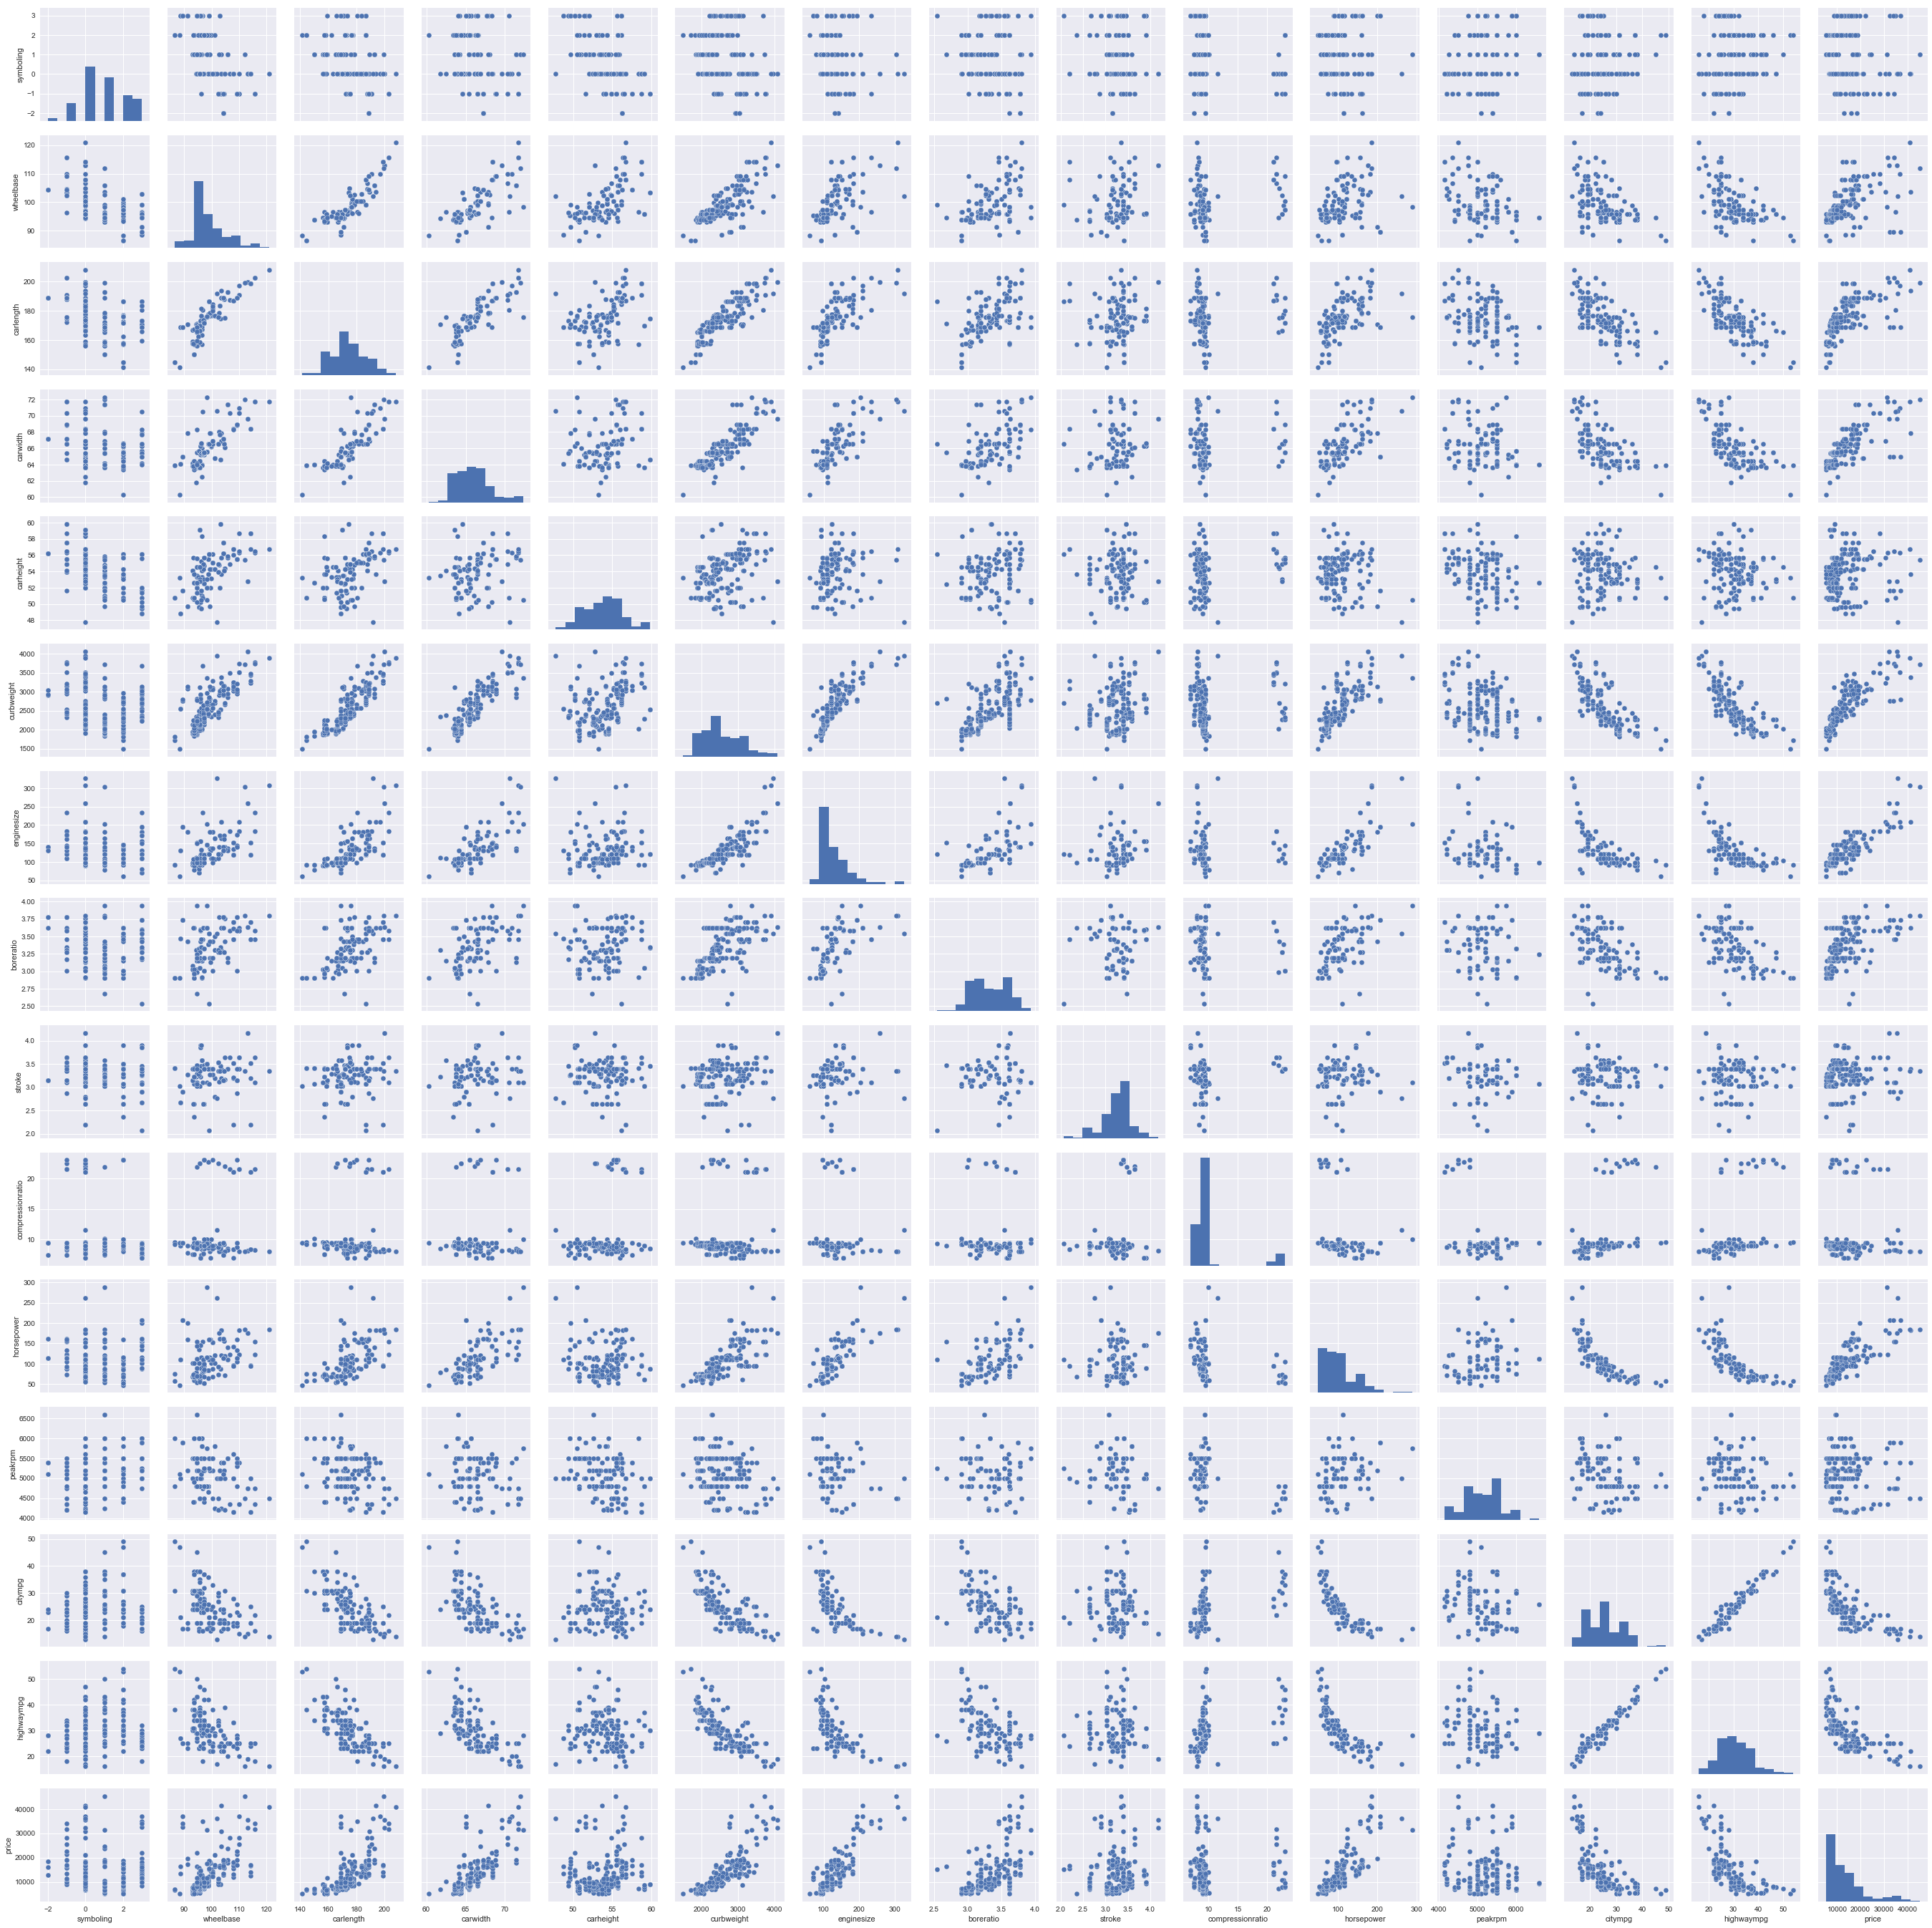

In [21]:
sns.pairplot(car)
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

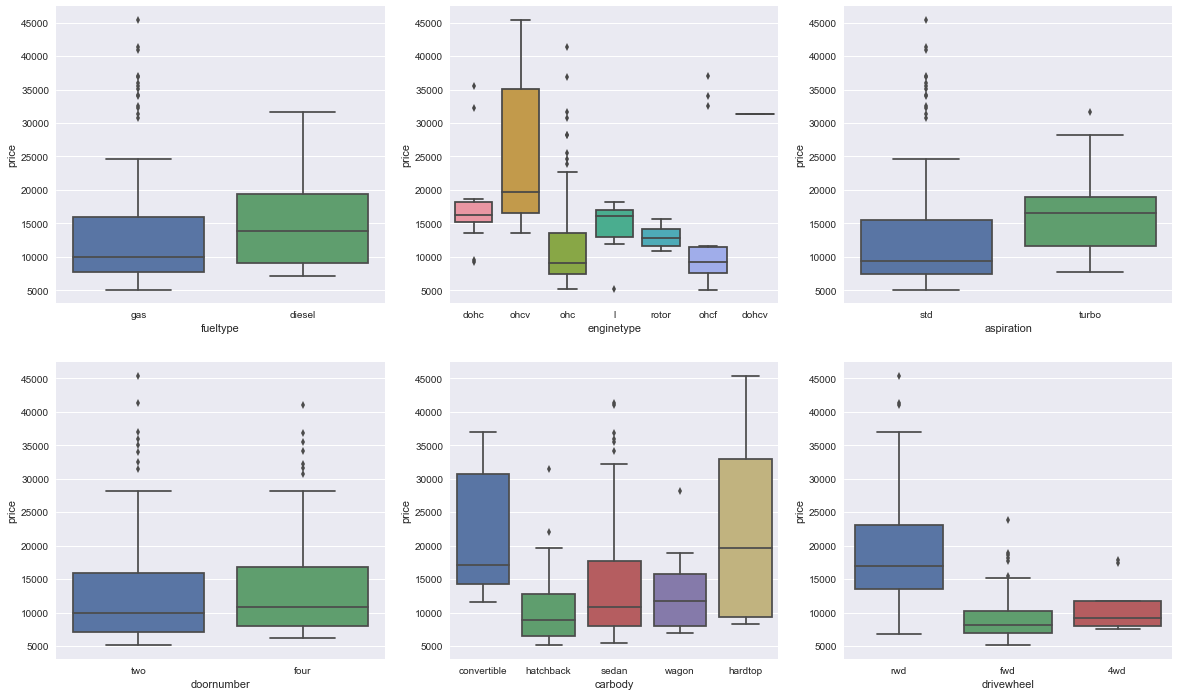

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.show()

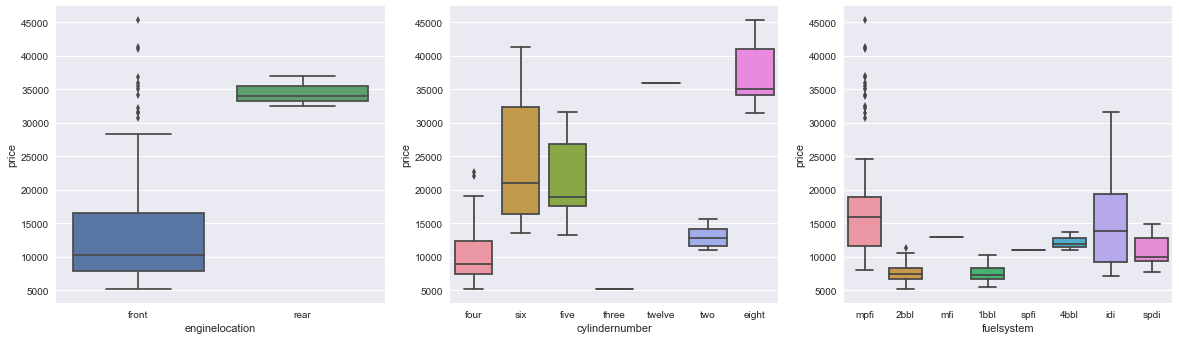

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

Based on fundamental instincts, we can say that theres a relationship between Company and Price, So we'll create a box plot for CarCompany vs Price

In [41]:
len(car['CarCompany'].unique())
##There are 28 Car Companies

28

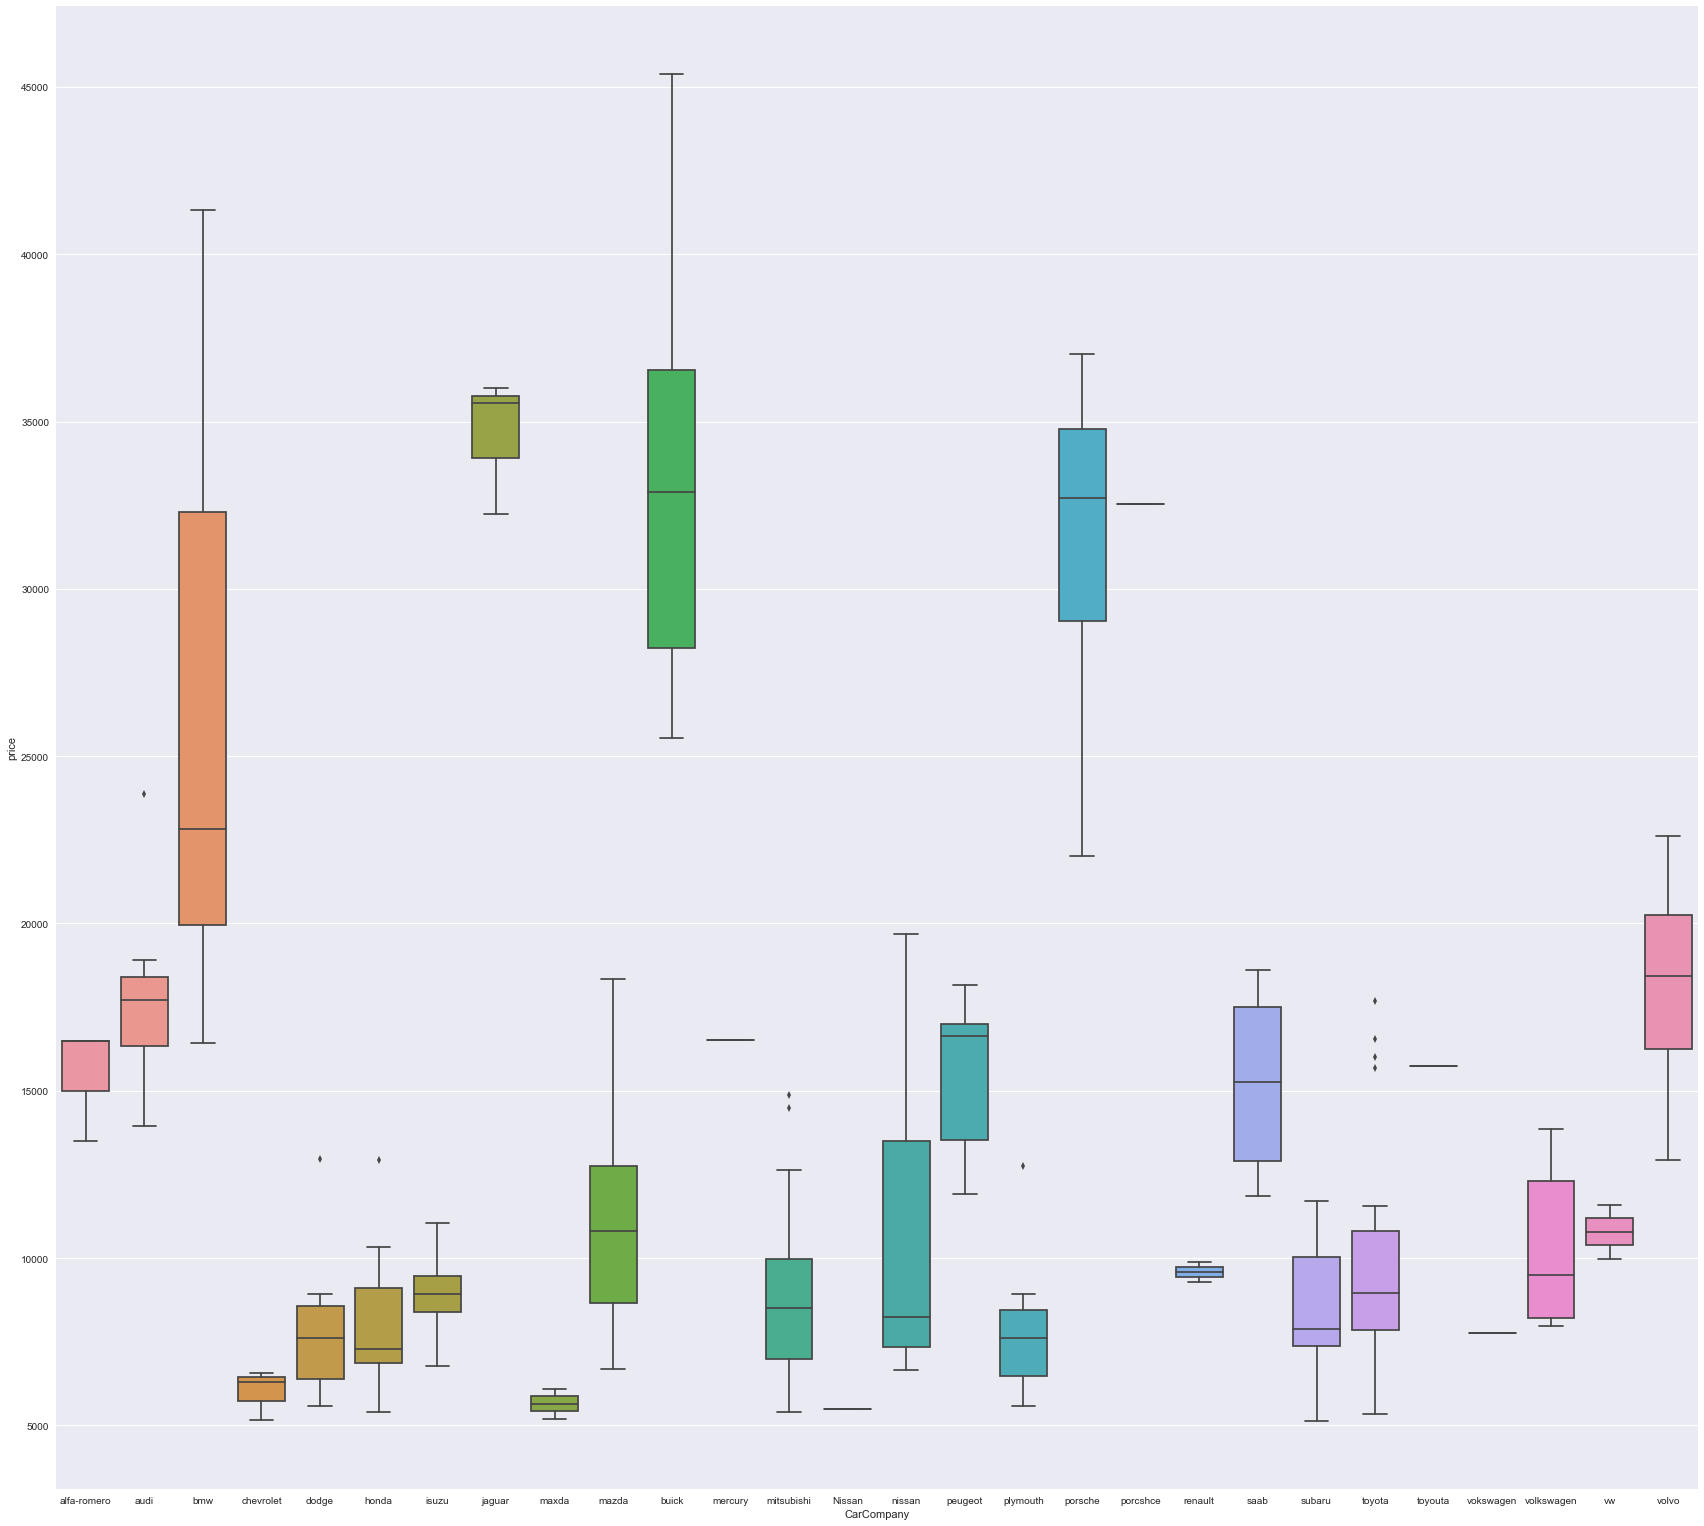

In [37]:
plt.figure(figsize=(100, 60))
plt.subplot(2,3,1)
sns.boxplot(x = 'CarCompany', y = 'price', data = car)
plt.show()
##By looking at the below mentioned Box Plots we can say that, there is a significant relation between CarCompany and price.

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for EngineType  with FuelType as the hue.

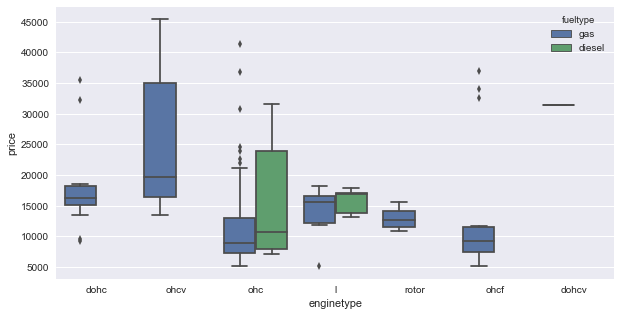

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = car)
plt.show()
#By looking at thebelow plot for EngineType  with FuelType as the hue. 
#We don't see any significance difference played by fuel type in deciding price for various enginetype

## Data Preparation: Phase 2

### Dummy Variables

For example: The variable fueltype has two levels. We need to convert these two levels into integer as well.

For this, we will use something called dummy variables.
As we know, we need only n-1 variable when n 

In [53]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'Is_gas'
is_gas = pd.get_dummies(car['fueltype'])

In [54]:
is_gas.head()
#Only one varible gas is enough t identify whether the vehicle is gas or diesel

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
# Let's drop the first column from status df using 'drop_first = True'

is_gas = pd.get_dummies(car['fueltype'], drop_first = True)

In [57]:
# Add the results to the original car dataframe

car = pd.concat([car, is_gas], axis = 1)

In [58]:
# Now let's see the head of our dataframe.

car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,gas
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [59]:
# Drop 'fueltype' as we have created the dummies for it

car.drop(['fueltype'], axis = 1, inplace = True)